In [1]:
from __future__ import print_function
import torch
import torch.optim as optim
from model import Net, model_summary, train, test
from utils import data_loader
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Torch is used to specify the device. Device needs to be specified, if the gpu is available, training and testing will be done on gpu
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)

In [3]:
# geenrating model summary
model_summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
       BatchNorm2d-2            [-1, 8, 26, 26]              16
           Dropout-3            [-1, 8, 26, 26]               0
            Conv2d-4           [-1, 16, 24, 24]           1,168
       BatchNorm2d-5           [-1, 16, 24, 24]              32
           Dropout-6           [-1, 16, 24, 24]               0
            Conv2d-7           [-1, 32, 22, 22]           4,640
       BatchNorm2d-8           [-1, 32, 22, 22]              64
           Dropout-9           [-1, 32, 22, 22]               0
        MaxPool2d-10           [-1, 32, 11, 11]               0
           Conv2d-11            [-1, 8, 11, 11]             264
      BatchNorm2d-12            [-1, 8, 11, 11]              16
           Conv2d-13             [-1, 16, 9, 9]           1,168
      BatchNorm2d-14             [-1, 1

/content/model.py:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [4]:
torch.manual_seed(1)
# setting the batch size for each epoch
batch_size = 32
'''
For the training, transformations such as scaling, normalizing, cropping, and flipping. This will help the network generalize the model leading to a better performance. The input data is resized to 28x28 pixels. The testing data are used to check the model's performance on data. For this noscaling or rotation transformations are required.
The model is trained on MNIST data and the data normalization needs to be done to the mean and standard deviation of the images to what the network expects. Mean Pixel value is 33.79122543334961, and Standard deviation is 79.17247009277344 and when scaled it is 0.1325146108865738 and 0.3104802668094635 respectively.
'''
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

train_loader, test_loader = data_loader(batch_size, kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 391135154.47it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 45233642.20it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 92795880.70it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21772032.88it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [5]:
# Sending the model to the device and setting the optimizer with default values
'''
Creating an instance of the model and defining the optimizer
Defining the learning rate scheduler
Setting the number of epochs and starting the training loop
'''
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# iterating through each epoch and passing the data to the train and test functions and printing the accuracy.
for epoch in range(1, 20):
    print("Epoch-", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Epoch- 1


loss=0.013260181993246078 batch_id=1874: 100%|██████████| 1875/1875 [01:07<00:00, 27.72it/s]



Test set: Average loss: 0.0411, Accuracy: 9875/10000 (98.8%)

Epoch- 2


loss=0.00925690308213234 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.25it/s]



Test set: Average loss: 0.0325, Accuracy: 9904/10000 (99.0%)

Epoch- 3


loss=0.02969125285744667 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.23it/s]



Test set: Average loss: 0.0299, Accuracy: 9901/10000 (99.0%)

Epoch- 4


loss=0.005388396792113781 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.29it/s]



Test set: Average loss: 0.0251, Accuracy: 9916/10000 (99.2%)

Epoch- 5


loss=0.0007659718976356089 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.34it/s]



Test set: Average loss: 0.0251, Accuracy: 9922/10000 (99.2%)

Epoch- 6


loss=0.0019999246578663588 batch_id=1874: 100%|██████████| 1875/1875 [01:05<00:00, 28.54it/s]



Test set: Average loss: 0.0211, Accuracy: 9931/10000 (99.3%)

Epoch- 7


loss=0.0007212330820038915 batch_id=1874: 100%|██████████| 1875/1875 [01:05<00:00, 28.50it/s]



Test set: Average loss: 0.0212, Accuracy: 9927/10000 (99.3%)

Epoch- 8


loss=0.03179338946938515 batch_id=1874: 100%|██████████| 1875/1875 [01:05<00:00, 28.51it/s]



Test set: Average loss: 0.0229, Accuracy: 9922/10000 (99.2%)

Epoch- 9


loss=0.004813999868929386 batch_id=1874: 100%|██████████| 1875/1875 [01:05<00:00, 28.63it/s]



Test set: Average loss: 0.0219, Accuracy: 9935/10000 (99.3%)

Epoch- 10


loss=0.008774971589446068 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.40it/s]



Test set: Average loss: 0.0216, Accuracy: 9925/10000 (99.2%)

Epoch- 11


loss=0.010130762122571468 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.14it/s]



Test set: Average loss: 0.0205, Accuracy: 9934/10000 (99.3%)

Epoch- 12


loss=0.0032290066592395306 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.19it/s]



Test set: Average loss: 0.0218, Accuracy: 9936/10000 (99.4%)

Epoch- 13


loss=0.039933037012815475 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.24it/s]



Test set: Average loss: 0.0221, Accuracy: 9937/10000 (99.4%)

Epoch- 14


loss=0.0011146105825901031 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.12it/s]



Test set: Average loss: 0.0253, Accuracy: 9917/10000 (99.2%)

Epoch- 15


loss=0.0013200226239860058 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.36it/s]



Test set: Average loss: 0.0232, Accuracy: 9932/10000 (99.3%)

Epoch- 16


loss=0.0004549995355773717 batch_id=1874: 100%|██████████| 1875/1875 [01:06<00:00, 28.35it/s]



Test set: Average loss: 0.0228, Accuracy: 9923/10000 (99.2%)

Epoch- 17


loss=0.002814121078699827 batch_id=1874: 100%|██████████| 1875/1875 [01:05<00:00, 28.48it/s]



Test set: Average loss: 0.0215, Accuracy: 9933/10000 (99.3%)

Epoch- 18


loss=0.0008101246785372496 batch_id=1874: 100%|██████████| 1875/1875 [01:05<00:00, 28.69it/s]



Test set: Average loss: 0.0268, Accuracy: 9914/10000 (99.1%)

Epoch- 19


loss=0.021438995376229286 batch_id=1874: 100%|██████████| 1875/1875 [01:05<00:00, 28.45it/s]



Test set: Average loss: 0.0220, Accuracy: 9930/10000 (99.3%)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1295: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  ret = func(*args, **kwargs)


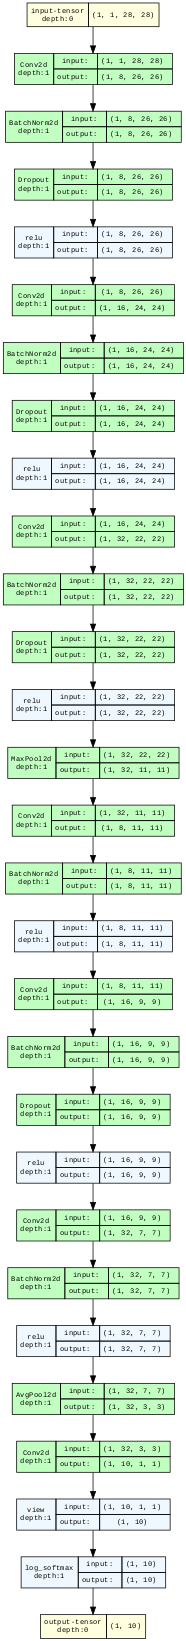

In [9]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(Net(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph